<a href="https://colab.research.google.com/github/restful3/ds4th_study/blob/main/source/LangChain%ED%95%99%EC%8A%B5/6_TextSplitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

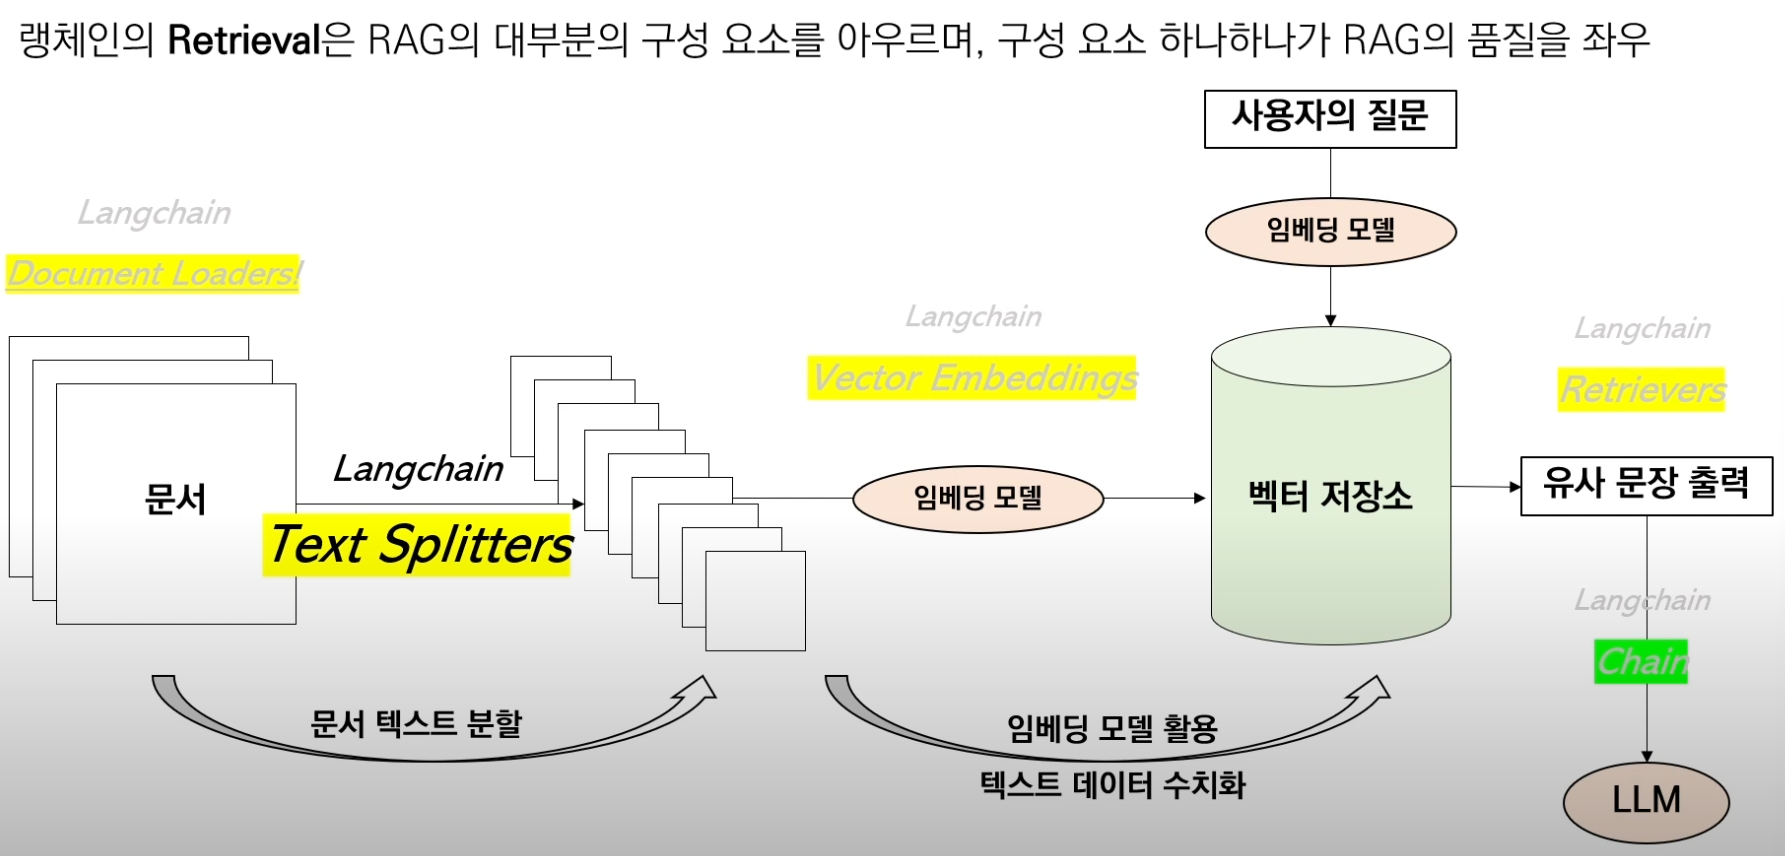

## Text Splitter개념
- 토큰제한이 있는 LLM이 여러 문장을 참고해서 답변할 수 있도록 문서를 분리하는 역할을 함
  - 적절한 chunk크기가 몇인가?
    - chunk : max_token 크기 단위로 분할
  - 어떻게 구분하여 정리해둘것인가 (임베딩)

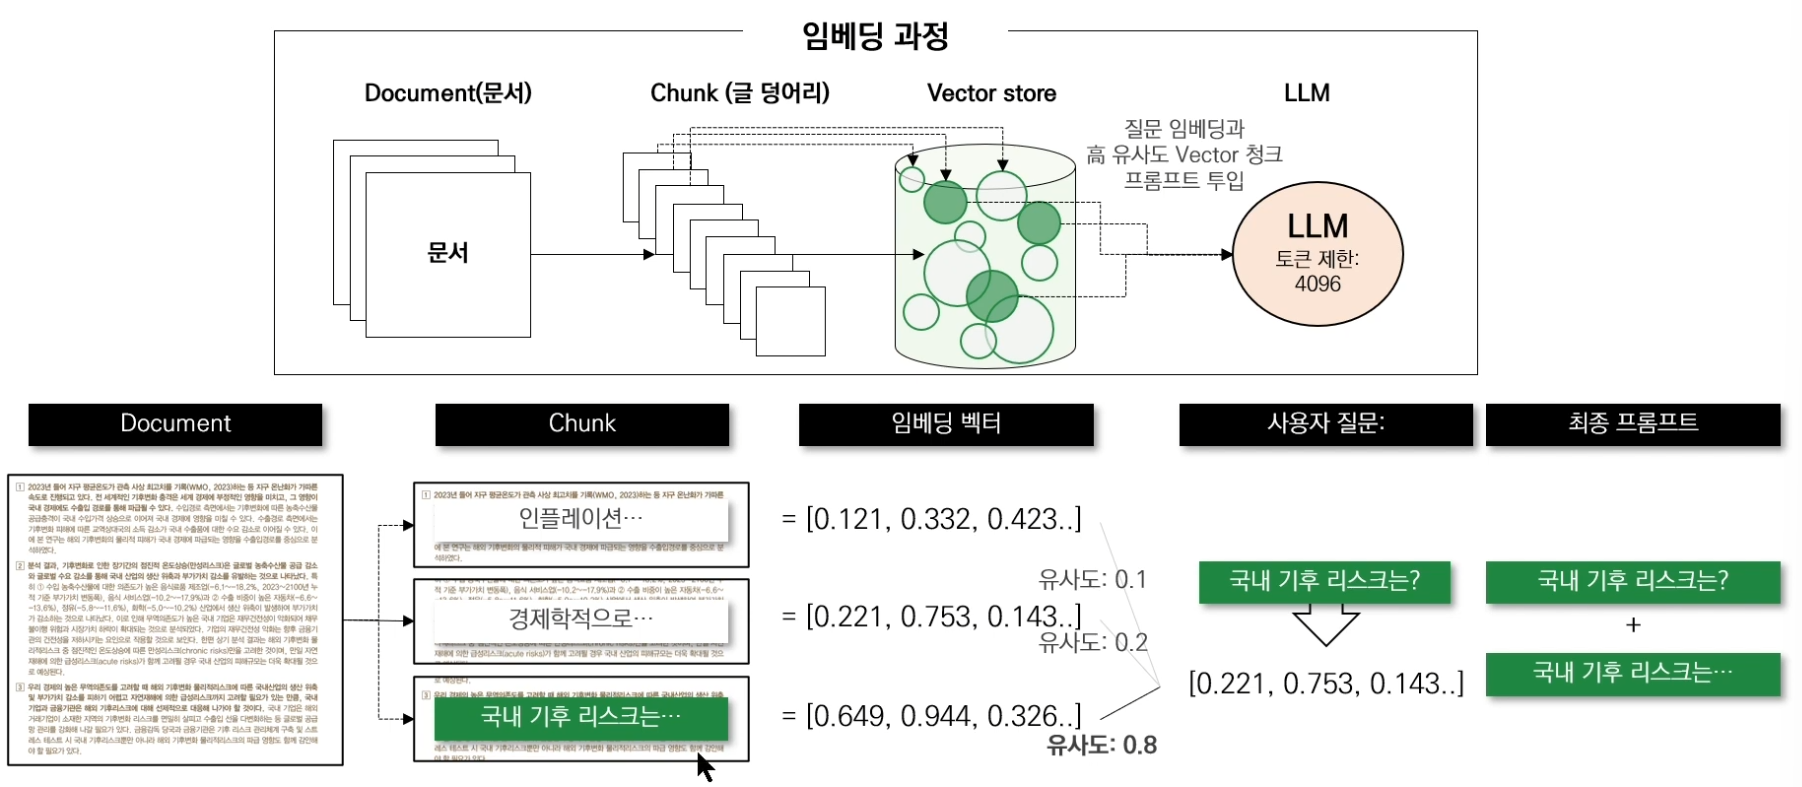

In [ ]:
!pip install langchain unstructured pypdf pdf2image docx2txt pdfminer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 19.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 397.5/397.5 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.7/274.7 kB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 27.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 39.2 MB/s eta 0:00:00
  Created wheel for docx2txt: filename=docx2txt-0.8-py3-none-any.whl size=3960 sha256=4277e8091bc20a8a0481bc0b4f0bf321fc09f52122ba965bb7f7cfe2a13d6601
  Stored in directory: /root/.cache/pip/wheels/22/58/cf/093d0a6c3ecfdfc5f6ddd55

In [ ]:
from google.colab import drive
drive.mount('/content.drive')

## CharacterTextSplitter
- 가장간단한 분할기

In [ ]:
with open('/content/drive/MyDrive/SelfStudy/기타정리/구글애널리틱스 요약.txt') as f:
  summary = f.read()

In [ ]:
from langchain.text_splitter import CharacterTextSplitter
text_splitter = CharacterTextSplitter(separator='\n\n',
    chunk_size=200,
    chunk_overlap=20, # 앞-뒤 청크가 겹치는 토큰수
    length_function=len
)

In [ ]:
# prompt:
texts = text_splitter.split_text(summary)
print(texts[0])
print('-'*20)
print(texts[1])
print('-'*20)
print(texts[2])

1. GA 입문
--------------------
1.1 왜 디지털 Analystics를 써야 하나
- 구글at는 사용자 브라우저의 쿠키를 기반으로 데이터를 모으고 종합하는 플랫폼이다.
- 오프라인과는 다르게 온라인은 Acqusition, Behavior, Conversion 전단계에 있어서 추적이 가능함
- 구글 애널리틱스는 다양한 시스템(모바일앱, 온라인 POS, 비디오게임콘솔, CRM시스템 등 인터넷에 연결된 모든 플렛폼)
 으로부터 데이터를 받아서, 분석레포트로 상세한 분석이 가능하다.
	: 고객에 대한 이해와 웹페이지 내의 구매여정을 이해하는데 도움을 준다
	: 사업을 향상시키는데 새로운 방법을 찾을 수 있다.
--------------------
1.2 구글Analytics가 작동하는 방식


> Chunk Size가 맘대로인 거 같은데 확인해보자

In [ ]:
size1 = [len(texts[i]) for i in range(len(texts))]
size1

[8,
 322,
 24,
 537,
 18,
 426,
 12,
 483,
 29,
 448,
 322,
 178,
 34,
 549,
 480,
 182,
 330,
 59,
 157,
 155,
 250,
 177,
 448,
 329]

> document객체로 만들겠다면...(전의 강의에서 랭체인으로 로딩하듯...)

In [ ]:
text_splitter.create_documents([summary])

[Document(page_content='1. GA 입문'),
 Document(page_content='1.1 왜 디지털 Analystics를 써야 하나\n- 구글at는 사용자 브라우저의 쿠키를 기반으로 데이터를 모으고 종합하는 플랫폼이다.\n- 오프라인과는 다르게 온라인은 Acqusition, Behavior, Conversion 전단계에 있어서 추적이 가능함\n- 구글 애널리틱스는 다양한 시스템(모바일앱, 온라인 POS, 비디오게임콘솔, CRM시스템 등 인터넷에 연결된 모든 플렛폼)\n 으로부터 데이터를 받아서, 분석레포트로 상세한 분석이 가능하다.\n\t: 고객에 대한 이해와 웹페이지 내의 구매여정을 이해하는데 도움을 준다\n\t: 사업을 향상시키는데 새로운 방법을 찾을 수 있다.'),
 Document(page_content='1.2 구글Analytics가 작동하는 방식'),
 Document(page_content="- 순서\n1) 구글 at 계정부터 만들고,\n2) 자바코드(트랙킹코드)를 사이트의 각 페이지마다 심어야함(<head> 뒤에)\n(고객이 각 페이지를 방문시마다, 정보/행위 추적)\n\t: 얼마나 많은 고객이 각페이지에 왔는지\n\t: 얼마나 많은 고객이 어떤 기기로 샀는지\n\t: 어떤 브라우저, 언어셋팅, 디바이스, 운영시스템(윈도우/맥), \n\t 트래픽소스(이메일마케팅으로 왔는지, 서치엔진에서 왔는지, 광고클릭에서 왔는지 등)\n- 필터를 설정하면, 조건에 따라 데이터를 추출보관\n\t: 데이터 필터를 설정하면 DB는 바뀔 수 없음\n- 세션 : 웹사이트 방문 후 특정시간(30분) 간 하는 모든 행동의 집합 (1회 방문으로 이해하면 쉬움)\n\t: 단, 1개 세션 종료(30분) 후 2번째 세션이 시작\n- 히트 : 가장 작은 단위이며 웹사이트에서 하는 모든 행동 (예, 페이지 열고, 영상보고, 스크롤하는 등)\n\t: 가장 기본 활동인 '페이지뷰'는 기본테그 설치만으로도 측정되나, \n  \t링크 클릭하고 다운로드 하거나 폼입력

In [ ]:
from langchain.document_loaders import PyPDFLoader
loader  = PyPDFLoader('/content/drive/MyDrive/SelfStudy/준비/571932.pdf')
pages =loader.load_and_split()

In [ ]:
len(pages)

8

In [ ]:
from langchain.text_splitter import CharacterTextSplitter
text_splitter = CharacterTextSplitter(separator='\n',
    chunk_size=1000,
    chunk_overlap=200, # 앞-뒤 청크가 겹치는 토큰수
    length_function=len
)


In [ ]:
texts = text_splitter.split_documents(pages)

In [ ]:
print(texts[1].page_content)

자외선 성능저하 및 열산화에 대한 내구성이 필요하며, 기계적 강도와 접착성 등이 역시 
필요하다. 유리, 폴리머 등을 활용 될 것인데, 이를 어떠한 방법으로 봉지 작업을 할 
것인가도 중요하다. 
 
 
 
 
     신재생  에너지   OVERWEIGHT   
 
Analyst 강동진  
02-3787 -2228    
dongjin.kang@hmsec.com  
  
  
 주요 이슈와  결론 
 - OLED 공정 응용 및 다양한  소재 적용으로  단점 극복 가능 
- 어플리케이션  및 EPBT 관점에서  수명이  10년 내외라도  충분히  매력적일  수 있음 
- 기술 격차도  중요하지만, 기존 자산 전환 비용 이슈가  더 중요. 중국 이외의  국가들이  산업을  
선도 할 전망 
 
산업 및 해당기업  주가 
- 국내 태양광  업체들이  PSC를 바탕으로  중장기  태양광  시장을  기술적으로  주도할  가능성이  
높다는  판단. 지속적인  관심 필요 
 페로브스카이트, 몇가지 물음에 대한 전망  
. Industry Note  
2020. 09. 2 9


In [ ]:
[len(str(texts[i])) for i in range(len(texts))]

[1107, 671, 1120, 788, 1104, 639, 1119, 718, 1082, 406, 777, 261, 1096, 594]

## RecurcsiveCharacterTextSplitter
- 코드, latex와 같이 컴퓨터 언어로 작성된 경우 각 언어 별 특별하게 구분하는 splitter 필요
  + 예 > python문서는 def, class등 하나의 단위로 묶이는 것을 기준으로 문서 분할

In [ ]:
from langchain.text_splitter import (
    RecursiveCharacterTextSplitter,
    Language
)

RecursiveCharacterTextSplitter.get_separators_for_language(Language.PYTHON)
# python으로 분할 시 어떤 구분자로 분할하는지 보여줌

['\nclass ', '\ndef ', '\n\tdef ', '\n\n', '\n', ' ', '']

In [44]:
PYTHON_CODE ="""
def hello_world():
  print('Hello,World!')

# Call the Funtion
hello_world()
"""

python_splitter = RecursiveCharacterTextSplitter.from_language(
    language=Language.PYTHON, chunk_size=50, chunk_overlap=0
)
python_docs = python_splitter.create_documents([PYTHON_CODE])
python_docs


[Document(page_content="def hello_world():\n  print('Hello,World!')"),
 Document(page_content='# Call the Funtion\nhello_world()')]

### 토큰단위 텍스트 분할기
텍스트 분할의 목적은 LLM이 소화할 수 있을 정도의 텍스트만 호출하도록 만드는 것입니다. 따라서 LLM이 소화할 수 있는 양으로 청크를 제한하는 것은 LLM 앱을 개발할 때 필수적인 과정입니다.


LLM은 텍스트를 받아들일 때 정해진 토큰 이상으로 소화할 수 없게 설계되어있습니다. 따라서 글을 토큰단위로 분할 한다면 최대한 많은 글을 포함하도록 Chunk를 분할할 수 있습니다.

토큰은 텍스트와 달리 Transformer 에서 처리하는 방식에 따라서 그 수가 달라질 수 있습니다. 따라서 LLM앱을 개발하고자 한다면 앱에 얹힐 LLM의 토큰 제한을 파악하고 해당 LLM이 사용하는 Embedder를 기반으로 토큰수를 계산해야 합니다. 예를 들어 OpenAI의 GPT 모델은 tiktoken이라는 토크나이저를 기반으로 텍스트를 토큰화 합니다. 따라서 tiktoken encoder를 기반으로 텍스트를 토큰화하고, 토큰수를 기준으로 텍스트를 분할하는 것이 프로덕트 개발의 필수 요소입니다

In [46]:
!pip install tiktoken

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires openai, which is not installed.


In [47]:
import tiktoken
tokenizer = tiktoken.get_encoding('cl100k_base') # cl100k_base는 gpt계열 인코딩시 쓰는 모델

def tiktoken_len(text):
  tokens = tokenizer.encode(text)
  return len(tokens)

In [49]:
tiktoken_len(texts[1].page_content)

451

In [56]:
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 1000, chunk_overlap=0, length_function = tiktoken_len
)
texts = text_splitter.split_documents(pages)

In [57]:
print(len(texts[1].page_content))
print(tiktoken_len(texts[1].page_content))


281
254


In [58]:
[tiktoken_len(texts[i].page_content) for i in range(len(texts))]

[916, 254, 943, 357, 935, 188, 924, 105, 968, 25, 609, 122, 905, 177]

1000개 이하로 chunk가 정리되었으며, LLM에 context를 이렇게 정리해서 넣으면 max_token 제한 이슈를 피할 수 있게된다.